In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

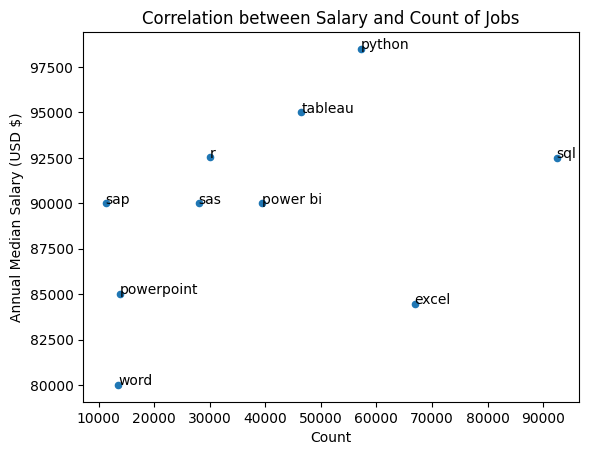

In [11]:
df_DA = df[df['job_title_short'] == 'Data Analyst']
df_DA = df_DA.explode('job_skills')
skill_stat = df_DA.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
skill_stat = skill_stat.sort_values(by='skill_count', ascending= False).head(10)
skill_stat.plot(
    kind = 'scatter',
    x = 'skill_count',
    y = 'median_salary'
)
plt.xlabel('Count')
plt.ylabel('Annual Median Salary (USD $)')
plt.title('Correlation between Salary and Count of Jobs')
for i ,txt in enumerate(skill_stat.index):
    plt.text(skill_stat['skill_count'].iloc[i],skill_stat['median_salary'].iloc[i],txt)
plt.show()

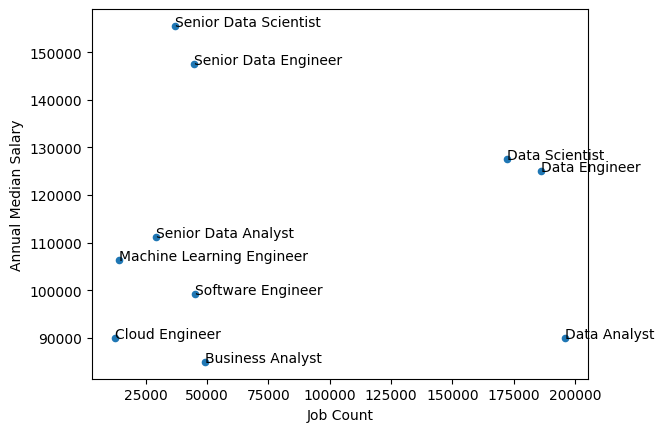

In [20]:
df_salary = df.groupby('job_title_short').agg(
    job_count = ('job_title_short','count'),
    median_salary = ('salary_year_avg','median')
)
df_salary = df_salary.sort_values('job_count',ascending=False)
df_salary.plot(
    kind = 'scatter',
    x = 'job_count',
    y = 'median_salary'
)
plt.xlabel('Job Count')
plt.ylabel('Annual Median Salary')
for j,txt in enumerate(df_salary.index):
    plt.text(df_salary['job_count'].iloc[j],df_salary['median_salary'].iloc[j],txt)

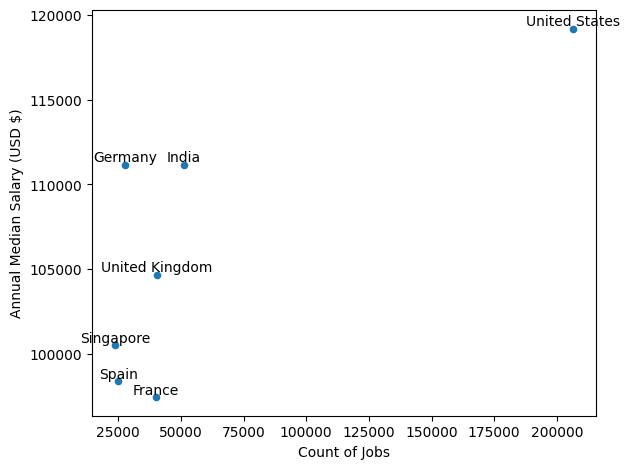

In [36]:
df_country = df.groupby('job_country').agg(
    job_count = ('job_country','count'),
    median_salary = ('salary_year_avg','median')
).dropna()
df_country =df_country.sort_values(by='job_count',ascending=False).head(7)
df_country.plot(
    kind='scatter',
    x = 'job_count',
    y = 'median_salary'
)
for k, txt in enumerate(df_country.index):
    plt.text(df_country['job_count'].iloc[k],df_country['median_salary'].iloc[k],txt, ha='center',va='bottom')
plt.xlabel('Count of Jobs')
plt.ylabel('Annual Median Salary (USD $)')
plt.tight_layout()
plt.show()

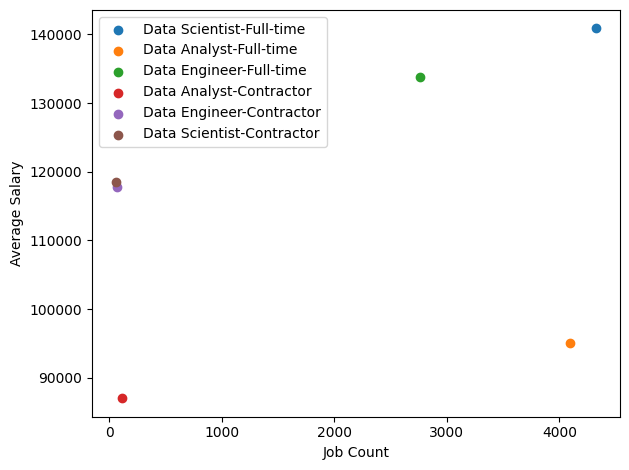

In [ ]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_filtered = df[
    (df['job_country'] == 'United States') & 
    (df['job_schedule_type'].isin(['Full-time','Contractor']))&
    (df['job_title_short'].isin(target_job_titles))
    ].dropna(subset='salary_year_avg').copy()

job_stat = df_filtered.groupby(['job_title_short','job_schedule_type']).agg(
    count = ('job_title_short','count'),
    avg_salary = ('salary_year_avg', 'mean')
).dropna()

job_stat.reset_index(inplace= True)

job_stat['job_title_type'] = job_stat['job_title_short'] + '-' + job_stat['job_schedule_type']
job_stat= job_stat.sort_values(by = 'count',ascending=False)


for job_title in job_stat['job_title_type'].unique():
    subset = job_stat[job_stat['job_title_type'] == job_title]
    plt.scatter(subset['count'],subset['avg_salary'], label=job_title)
plt.xlabel('Job Count')
plt.ylabel('Average Salary')
plt.legend()
plt.tight_layout()
plt.show()


In [95]:
type(df)

pandas.core.frame.DataFrame